<a href="https://colab.research.google.com/github/Aleksandra2002/obliczenia_naukowe/blob/main/LAB9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tworzenie grafów

### Wierzchołki

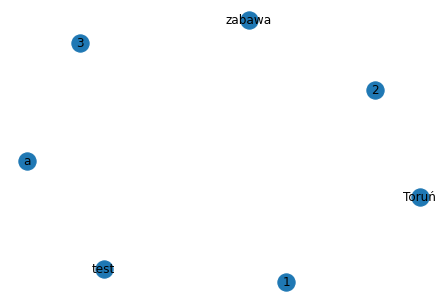

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
G = nx.Graph() #tworzenie obiektu grafu
G.add_node('a')
G.add_node(1,weight=5)
G.add_nodes_from(['test','zabawa','Toruń',2,3])
#nx.draw(G) #rysowanie aktualnego stanu grafu G, także nx.draw_networkx(G)
nx.draw(G,with_labels=True)

In [2]:
list(G.nodes)

['a', 1, 'test', 'zabawa', 'Toruń', 2, 3]

Wierzhołkom można nadawać różne artybuty, do których mamy dostęp jak do tablic.

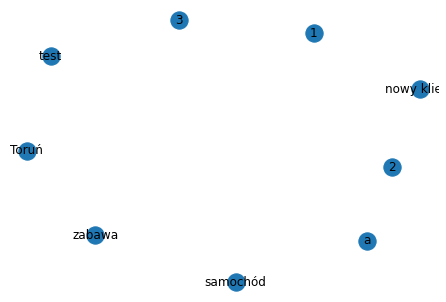

In [3]:
G.add_nodes_from([
    ('nowy klient', {'wzrost':'180', 'wiek':25}),
    ('samochód',{'kolor':'red'})]) #to nie jest kolor na rysunku
nx.draw(G,with_labels=True)

In [4]:
G.nodes

NodeView(('a', 1, 'test', 'zabawa', 'Toruń', 2, 3, 'nowy klient', 'samochód'))

In [5]:
G.nodes['nowy klient']['wzrost']

'180'

In [6]:
G.nodes['samochód']['moc']=100

### Krawędzie

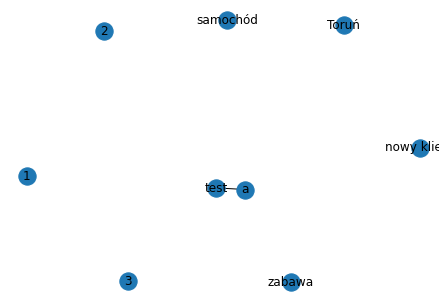

In [7]:
G.add_edge('a','test')
nx.draw(G,with_labels=True)

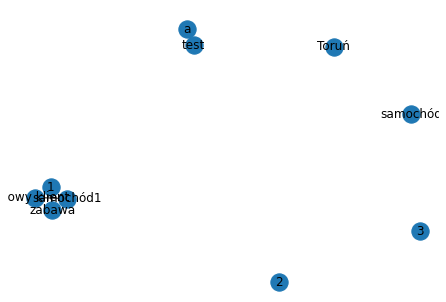

In [8]:
G.add_edges_from([('nowy klient','samochód1'),(1,'zabawa')])
nx.draw(G,with_labels=True)

In [9]:
H=nx.Graph([(1,2),(22,33),(11,33)]) #można szybko dodawać krawędzie bezpośrednio w konstruktorze. Dodają się wtedy też wierzchołki
H.edges

EdgeView([(1, 2), (22, 33), (33, 11)])

In [10]:
H.add_nodes_from(G) #nie przenoszą się krawędzie i atrybuty
print(H.nodes)
print(H.edges)

[1, 2, 22, 33, 11, 'a', 'test', 'zabawa', 'Toruń', 3, 'nowy klient', 'samochód', 'samochód1']
[(1, 2), (22, 33), (33, 11)]


In [11]:
H.add_edges_from(G.edges)
H.edges

EdgeView([(1, 2), (1, 'zabawa'), (22, 33), (33, 11), ('a', 'test'), ('nowy klient', 'samochód1')])

### Usuwanie i modyfikacja

In [12]:
print(f'Liczba krawędzi: {H.number_of_edges()}')

print(f'Liczba wierzchołków: {H.number_of_nodes()}')

Liczba krawędzi: 6
Liczba wierzchołków: 13


In [13]:
H.edges

EdgeView([(1, 2), (1, 'zabawa'), (22, 33), (33, 11), ('a', 'test'), ('nowy klient', 'samochód1')])

In [14]:
H.remove_edge(1,2)

Liczba krawędzi: 5
Liczba wierzchołków: 13


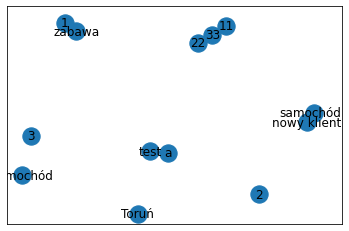

In [15]:
nx.draw_networkx(H)
print(f'Liczba krawędzi: {H.number_of_edges()}')
print(f'Liczba wierzchołków: {H.number_of_nodes()}')

### Inne ważne operacje
* ```H.nodes.data()``` - dane z wierzhołków
* ```add_weighted_edges_from(lista krotek)``` - każda 3-krotka to wierzchołki i waga krawędzi.
* ```nx.DiGraph()``` - tworzenie grafu skierowanego
* ```nx.MultiGraph()``` - tworzenie grafu z wielokrotnymi krawędziami między wierzchołkami
* ```compose(G1,G2)``` - sklejenie dwóch grafów wspólnumi wierzchołkami
* ```G.subgraph([lista wierzchołków])```

### Klasyczne grafy
* K_5=nx.complete_graph(5)
* K_3_5=nx.complete_bipartite_graph(3,5)
* barbell=nx.barbell_graph(10,10)
* lollipop=nx.lollipop_graph(10,20)

In [ ]:
G.nodes.data()

NodeDataView({'a': {}, 1: {'weight': 5}, 'test': {}, 'zabawa': {}, 'Toruń': {}, 2: {}, 3: {}, 'nowy klient': {'wzrost': '180', 'wiek': 25}, 'samochód': {'kolor': 'red'}})

#### Zadanie:
Stwórz graf skierowany zawierający litery Twojego imienia. Dodaj krawędzie w taki sposób, by ścieżka dawała imię.

### Tworzenie grafów z plików

* .json - typ rozbudowanego słownika
* .csv - dane tabelaryczne; oddzielane przecinkami (domyślnie) w poszczególnych wierszach
* .xlsx (przez pandas) [przykład](https://github.com/Hevenicio/Network-Data-Science-with-NetworkX-and-Python/blob/master/task1.ipynb)
* czytanie różnych typów zapisów grafów



In [18]:
import requests
import json 

data=requests.get('https://raw.githubusercontent.com/danio2010/ON2022/main/tokyo-metro.json').json()


In [19]:
type(data)

dict

In [20]:
print(data.values()) #linie metra

dict_values([{'color': '#149848', 'transfers': [['C3', 'F15'], ['C4', 'Z2'], ['C4', 'G2'], ['C7', 'M14'], ['C7', 'N6'], ['C7', 'G6'], ['C8', 'M15'], ['C8', 'H6'], ['C9', 'H7'], ['C9', 'Y18'], ['C11', 'T9'], ['C11', 'M18'], ['C11', 'Z8'], ['C12', 'M19'], ['C18', 'H21']], 'travel_times': [['C1', 'C2', 2], ['C2', 'C3', 2], ['C3', 'C4', 1], ['C4', 'C5', 2], ['C5', 'C6', 2], ['C6', 'C7', 2], ['C7', 'C8', 1], ['C8', 'C9', 3], ['C9', 'C10', 1], ['C10', 'C11', 2], ['C11', 'C12', 2], ['C12', 'C13', 2], ['C13', 'C14', 2], ['C14', 'C15', 2], ['C15', 'C16', 2], ['C16', 'C17', 3], ['C17', 'C18', 3], ['C18', 'C19', 3]]}, {'color': '#f59230', 'transfers': [['G1', 'Z1'], ['G1', 'F16'], ['G2', 'Z2'], ['G2', 'C4'], ['G4', 'Z3'], ['G5', 'M13'], ['G5', 'Y16'], ['G5', 'Z4'], ['G5', 'N7'], ['G6', 'N6'], ['G6', 'M14'], ['G6', 'C7'], ['G9', 'M16'], ['G9', 'H8'], ['G11', 'T10'], ['G12', 'Z9'], ['G15', 'H16'], ['G16', 'H17']], 'travel_times': [['G1', 'G2', 2], ['G2', 'G3', 1], ['G3', 'G4', 2], ['G4', 'G5', 2], 

In [21]:
data['C']['transfers']

[['C3', 'F15'],
 ['C4', 'Z2'],
 ['C4', 'G2'],
 ['C7', 'M14'],
 ['C7', 'N6'],
 ['C7', 'G6'],
 ['C8', 'M15'],
 ['C8', 'H6'],
 ['C9', 'H7'],
 ['C9', 'Y18'],
 ['C11', 'T9'],
 ['C11', 'M18'],
 ['C11', 'Z8'],
 ['C12', 'M19'],
 ['C18', 'H21']]

In [22]:
metro=nx.Graph()
przesiadki=[]
for linia in data.values():
    przesiadki.extend(linia['transfers'])
#for linia_nazwa in data.keys():
#    przesiadki2.extend(data[linia_nazwa]['transfer'])
polaczenia=[]
for linia in data.values():
    polaczenia.extend(linia['travel_times'])
    
# inny sposób:
from itertools import chain
przesiadki2=list(chain.from_iterable([linia['transfers'] for linia in data.values()]))

In [24]:
metro.add_weighted_edges_from(polaczenia,transfer=False) #dodanie krawędzi czasu przejazdu między stacjami
metro.add_edges_from(przesiadki,transfer=True) # dodanie krawędzie z atrybutem między danymi liniami z punktach przesiadki


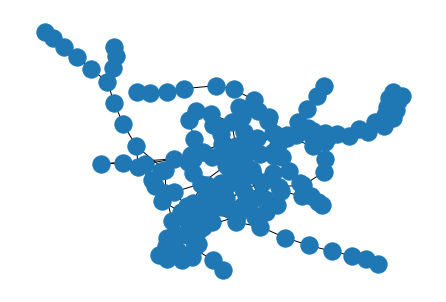

In [25]:
nx.draw(metro)

In [26]:
metro.number_of_nodes()

184

In [27]:
metro.number_of_edges()

243

In [28]:
metro.adj['C3']

AtlasView({'C2': {'transfer': False, 'weight': 2}, 'C4': {'transfer': False, 'weight': 1}, 'F15': {'transfer': True}})

## Rysowanie grafu

[]

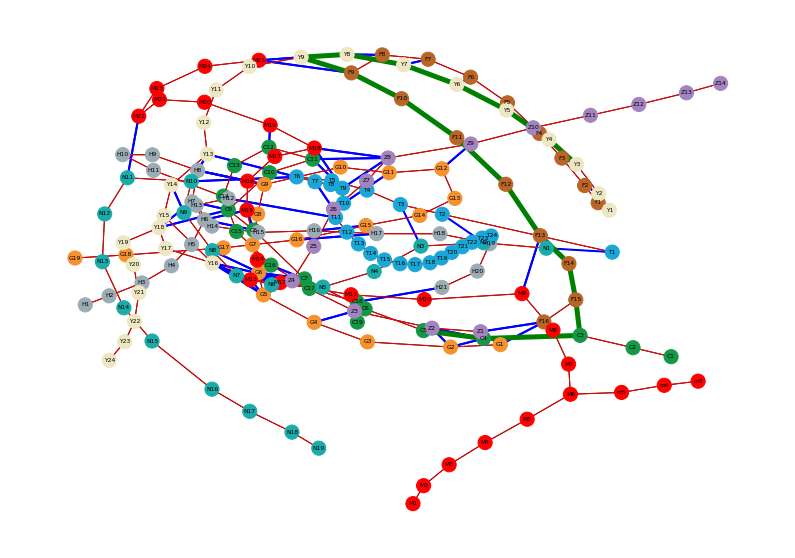

In [129]:
fig,osie=plt.subplots(1,1,figsize=(14,10))
# wybór mapowania pozycji
#pos = nx.drawing.nx_agraph.graphviz_layout(metro, prog="neato")
pos_s = nx.spring_layout(metro)
pos_sh = nx.shell_layout(metro)
pos_c = nx.circular_layout(metro)
pos_sp = nx.spectral_layout(metro)
pozycje=pos_s
nx.draw(metro,pos=pozycje,ax=osie,node_size=200,node_color=kolory) #baza
nx.draw_networkx_labels(metro, pos=pozycje, ax=osie, font_size=6) #labelki
nx.draw_networkx_edges(metro,pos=pozycje,ax=osie,edgelist=przesiadki,width=2,edge_color='blue') #przesiadki
nx.draw_networkx_edges(metro,pos=pozycje,ax=osie,edgelist=polaczenia,edge_color="red") #połączenia
nx.draw_networkx_edges(metro,pos=pozycje,ax=osie,edgelist=arr,edge_color="green",width=5)

# usuwanie osi
for side in ['bottom','right','top','left']:
    osie.spines[side].set_visible(False)

# usuwanie labelek osi
osie.set_xticks([])
osie.set_yticks([])

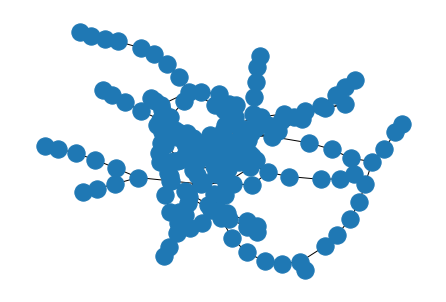

In [29]:
nx.draw(metro)

Mamy dostępne różne tryby (layout) wyświetlania:
* graphviz_layout
* pydot_layout
* circular_layout
* planar_layout
* Itd. [dokumentacja](https://networkx.org/documentation/stable/reference/drawing.html)

In [30]:
# Utworzenie listy kolorów wierzchołków
kolory=[data[stacja[0].upper()]["color"] for stacja in metro.nodes()] #stacja[0] bierze pierwszy znak z nazwy stacji

## Analiza sieci (grafu)
* ```H.adj[wierzchołek]``` - wierzchołki połączone z danym
* ```H.degree()``` - stopnie wszystkich wierzchołków
* ```H.degree[wierzhołek]``` - stopień wierzchołka
* ```nx.shortest_path(H,w1,w2)``` - najkrótsza ścieżka



Szukamy wierzchołków o największym stopniu

In [32]:
metro.degree()

DegreeView({'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 2, 'C6': 2, 'C7': 5, 'C8': 4, 'C9': 4, 'C10': 2, 'C11': 5, 'C12': 3, 'C13': 2, 'C14': 2, 'C15': 2, 'C16': 2, 'C17': 2, 'C18': 3, 'C19': 1, 'G1': 3, 'G2': 4, 'G3': 2, 'G4': 3, 'G5': 6, 'G6': 5, 'G7': 2, 'G8': 2, 'G9': 4, 'G10': 2, 'G11': 3, 'G12': 3, 'G13': 2, 'G14': 2, 'G15': 3, 'G16': 3, 'G17': 2, 'G18': 2, 'G19': 1, 'F1': 2, 'F2': 3, 'F3': 3, 'F4': 3, 'F5': 3, 'F6': 3, 'F7': 3, 'F8': 3, 'F9': 4, 'F10': 2, 'F11': 2, 'F12': 2, 'F13': 3, 'F14': 2, 'F15': 3, 'F16': 3, 'H1': 1, 'H2': 2, 'H3': 2, 'H4': 2, 'H5': 2, 'H6': 4, 'H7': 4, 'H8': 4, 'H9': 2, 'H10': 2, 'H11': 2, 'H12': 3, 'H13': 2, 'H14': 2, 'H15': 2, 'H16': 3, 'H17': 3, 'H18': 2, 'H19': 2, 'H20': 2, 'H21': 2, 'M1': 1, 'M2': 2, 'M3': 2, 'M4': 2, 'M5': 2, 'M6': 3, 'M7': 2, 'M8': 2, 'M9': 3, 'M10': 2, 'M11': 2, 'M12': 3, 'M13': 6, 'M14': 5, 'M15': 4, 'M16': 4, 'M17': 2, 'M18': 5, 'M19': 3, 'M20': 2, 'M21': 2, 'M22': 3, 'M23': 2, 'M24': 2, 'M25': 3, 'm3': 1, 'm4': 2, 'm5': 2, 'N1': 

In [33]:
d_max = max(d for (n, d) in metro.degree())
d_max

6

#### Zadanie: 
Znajdź wszystkie wierzchołki maksymalnego stopnia

In [34]:
[(n, d) for (n, d) in metro.degree() if d == d_max]

[('G5', 6), ('M13', 6), ('N7', 6), ('Y16', 6), ('Z4', 6)]

#### Zadanie:
Znajdź wszystkie stacje końcowe.

In [35]:
[n for (n, d) in metro.degree() if d == 1]

['C1', 'C19', 'G19', 'H1', 'M1', 'm3', 'N19', 'T24', 'Y24', 'Z14']


#### Zadanie: 
Znajdź najkrótszą i najszybszą ścieżkę między C5 i Y3 i zaznacz je grubymi liniami na grafie

```nx.shortest_path```

In [166]:
#najkrótsza
trasa=nx.shortest_path(metro, 'C5', 'Y3')
trasa

['C5',
 'C4',
 'C3',
 'F15',
 'F14',
 'F13',
 'F12',
 'F11',
 'F10',
 'F9',
 'Y9',
 'Y8',
 'Y7',
 'Y6',
 'Y5',
 'Y4',
 'Y3']

In [132]:
rows, cols = (16, 2)
shorter = [[0 for i in range(cols)] for j in range(rows)]

In [182]:
#daje liste przystanków[wyjazdu,przyjazdu]
arg=trasa[0]
j=0
for i in trasa:
  if i == trasa[0]:continue
  shorter[j]=[arg,i]
  j+=1
  arg=i
#shorter

In [112]:
graf=nx.Graph()

In [134]:
graf.add_edges_from(shorter,transfer=True,width=5)

#####na rysunku ładnym, jest gruba zielona linia i to to xd

In [176]:
transposed = []
for i in range(3):
  transposed.append([row[i] for row in polaczenia])

In [177]:
czas=tuple(transposed[2])

In [179]:
#najszybsza
faster=nx.shortest_path(metro, 'C5', 'Y3',czas)
faster

['C5',
 'C4',
 'C3',
 'F15',
 'F14',
 'F13',
 'F12',
 'F11',
 'F10',
 'F9',
 'Y9',
 'Y8',
 'Y7',
 'Y6',
 'Y5',
 'Y4',
 'Y3']

#### Zadanie:
Napisz funkcję obliczającą czas przejazdu po trasie (lista stacji).

In [183]:
def przejazd (a):
  rows, cols = (len(a), 2)
  lista_stacji = [[0 for i in range(cols)] for j in range(rows)]
  arg= a[0]
  j=0
  for i in a:
    if i == a[0]:continue
    lista_stacji[j]=[arg,i]
    j+=1
    arg=i
  
  


In [184]:
polaczenia

[['C1', 'C2', 2],
 ['C2', 'C3', 2],
 ['C3', 'C4', 1],
 ['C4', 'C5', 2],
 ['C5', 'C6', 2],
 ['C6', 'C7', 2],
 ['C7', 'C8', 1],
 ['C8', 'C9', 3],
 ['C9', 'C10', 1],
 ['C10', 'C11', 2],
 ['C11', 'C12', 2],
 ['C12', 'C13', 2],
 ['C13', 'C14', 2],
 ['C14', 'C15', 2],
 ['C15', 'C16', 2],
 ['C16', 'C17', 3],
 ['C17', 'C18', 3],
 ['C18', 'C19', 3],
 ['G1', 'G2', 2],
 ['G2', 'G3', 1],
 ['G3', 'G4', 2],
 ['G4', 'G5', 2],
 ['G5', 'G6', 2],
 ['G6', 'G7', 2],
 ['G7', 'G8', 2],
 ['G8', 'G9', 2],
 ['G9', 'G10', 1],
 ['G10', 'G11', 2],
 ['G11', 'G12', 2],
 ['G12', 'G13', 1],
 ['G13', 'G14', 2],
 ['G14', 'G15', 2],
 ['G15', 'G16', 1],
 ['G16', 'G17', 2],
 ['G17', 'G18', 1],
 ['G18', 'G19', 2],
 ['F1', 'F2', 3],
 ['F2', 'F3', 2],
 ['F3', 'F4', 3],
 ['F4', 'F5', 2],
 ['F5', 'F6', 2],
 ['F6', 'F7', 2],
 ['F7', 'F8', 2],
 ['F8', 'F9', 2],
 ['F9', 'F10', 3],
 ['F10', 'F11', 2],
 ['F11', 'F12', 2],
 ['F12', 'F13', 2],
 ['F13', 'F14', 3],
 ['F14', 'F15', 2],
 ['F15', 'F16', 2],
 ['H1', 'H2', 3],
 ['H2', 'H3',

#### Zadanie:
Dodaj do krawędzi przesiadkowych wagi (czasy przesiadek) proporcjonalne do iloczynu stopni dwóch wierzchołków ($(w1*w2)/4$) i oblicz wówczas najszybsze przejazdy między 5 parami losowo wybranych stacji.